<a href="https://colab.research.google.com/github/asdf1027/knu_bdna_2022.1801311/blob/main/%EA%B9%80%ED%98%84%EC%8B%9D11%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
# 11강

In [207]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import matplotlib.pyplot as plt
import mglearn

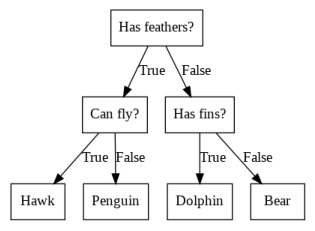

In [209]:
mglearn.plots.plot_animal_tree()

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [211]:
cancer=load_breast_cancer()

In [212]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [213]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [214]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.937


In [215]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
# maw_depth=4 로 설정

DecisionTreeClassifier(max_depth=4, random_state=0)

In [216]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 0.988
Test Accuracy: 0.951


In [217]:
from sklearn.tree import export_graphviz

In [218]:
export_graphviz(tree,out_file='tree.dot',class_names=['0','1'])

In [219]:
import graphviz

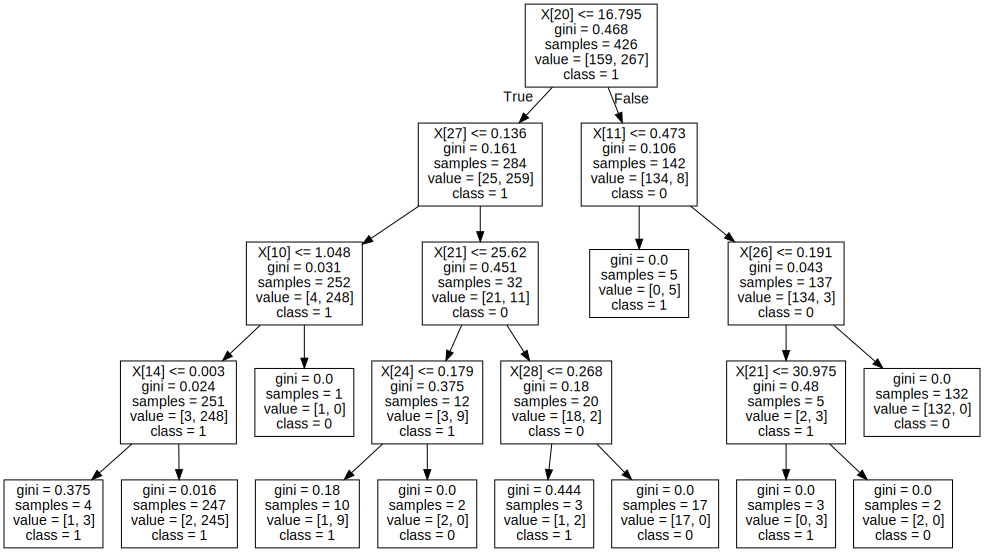

In [220]:
with open('tree.dot') as f:
  dot_graph=f.read()

display(graphviz.Source(dot_graph))
# import graphviz 를 입력하기

In [221]:
export_graphviz(tree,out_file='tree.dot',class_names=['0','1'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [222]:
import graphviz

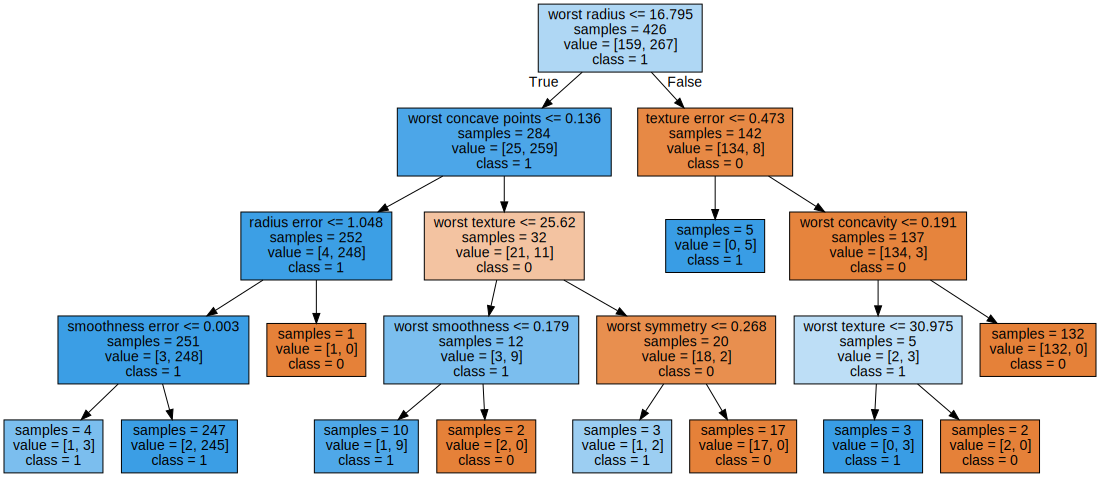

In [223]:
with open('tree.dot') as f:
  dot_graph=f.read()

display(graphviz.Source(dot_graph))

In [224]:
print('Feature importance: \n',tree.feature_importances_)

Feature importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [225]:
# 시각화

In [226]:
import numpy as np

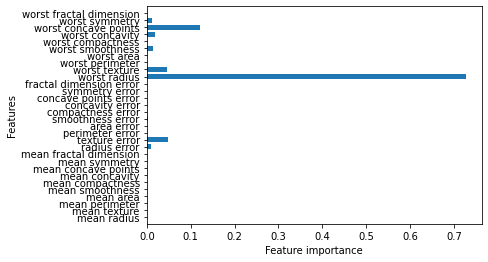

In [227]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [228]:
# Boston data에 tree 적용

In [229]:
from sklearn.datasets import load_boston

In [230]:
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [231]:
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=42)

In [232]:
from sklearn.tree import DecisionTreeRegressor

In [233]:
tree=DecisionTreeRegressor(random_state=0)

In [234]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [235]:
n_features=boston.data.shape[1]

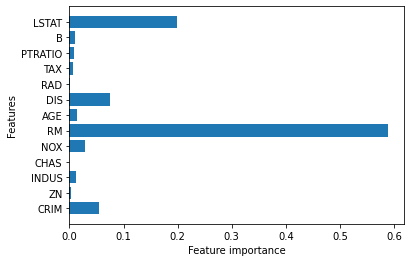

In [236]:
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [237]:
# Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
from sklearn.datasets import make_moons

In [240]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [242]:
forest=RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [243]:
print('Training Accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy: 0.987
Test Accuracy: 0.920


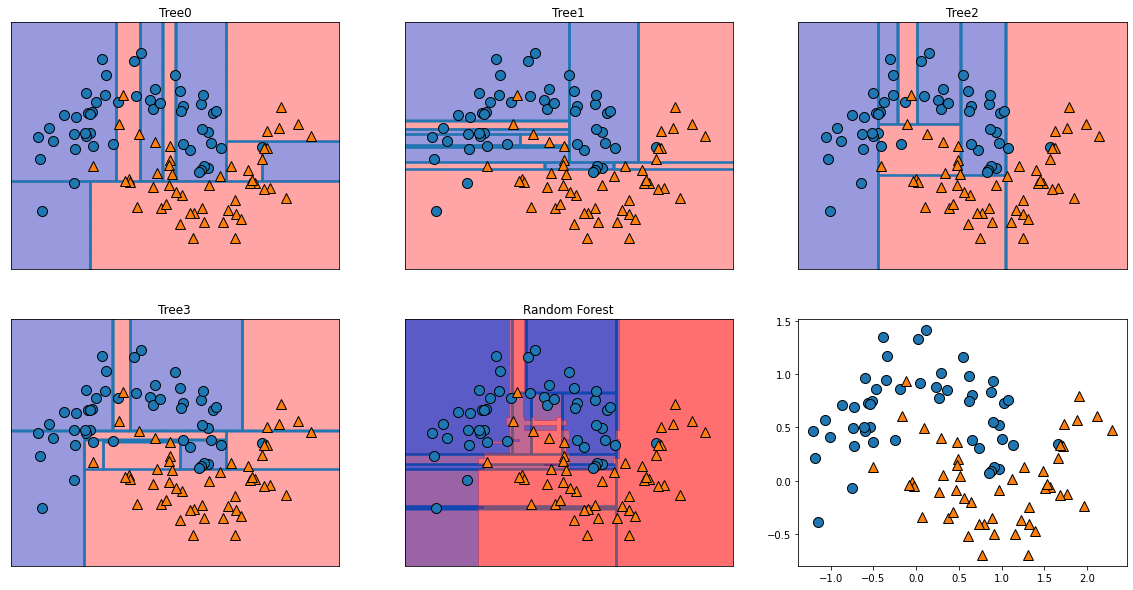

In [244]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title('Tree{}'.format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,1],alpha=0.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# Tree4가 출력되지 않음 
# Random Forest에 두개가 겹쳐서 출력됨

In [245]:
# 유방암 dataset에 적용

In [246]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

In [247]:
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [248]:
print('Training Accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.951


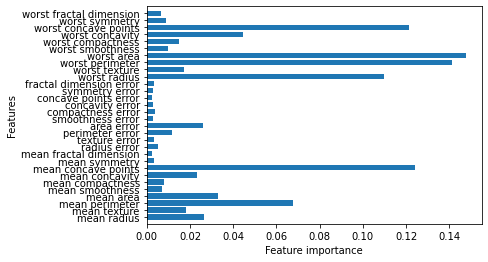

In [249]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [250]:
from sklearn.ensemble import GradientBoostingClassifier

In [251]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [252]:
print('Training Accuracy: {:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.958


In [253]:
gb=GradientBoostingClassifier(max_depth=4,learning_rate=0.01,n_estimators=300,random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300,
                           random_state=0)

In [254]:
print('Training Accuracy: {:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


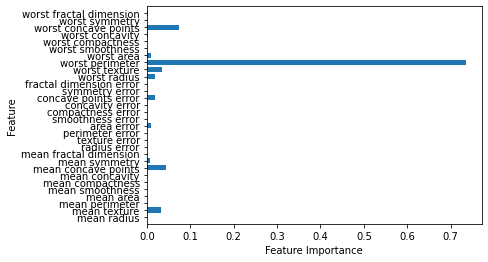

In [255]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),gb.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

In [256]:
# XG-Boosting

In [257]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [258]:
import xgboost as xgb

In [259]:
from xgboost import plot_importance

In [260]:
from xgboost import XGBClassifier

In [261]:
xgb=XGBClassifier(max_depth=4,learning_rate=0.01,n_estimators=100,random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(learning_rate=0.01, max_depth=4)

In [262]:
print('Training Accuracy: {:.3f}'.format(xgb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(xgb.score(X_test,y_test)))

Training Accuracy: 0.998
Test Accuracy: 0.937


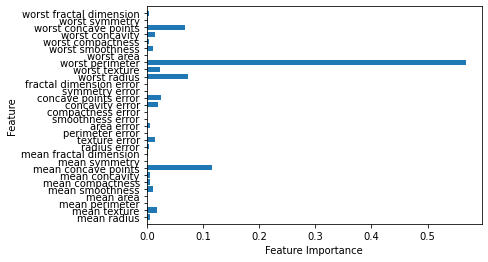

In [263]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),xgb.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()